# <center> SUICIDIOS EN COLOMBIA </center> 

<img src="banner_colombia.jpeg" style="width:1200px;">

In [1]:
from IPython.display import HTML
import random

In [2]:
def ocultar(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Mostrar/Ocultar'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)
ocultar()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.__version__
import random
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import *
ocultar()

# Dataset creado

## Extrayendo datos de medicina legal

In [4]:
dpto=np.array(['Amazonas','Antioquia','Arauca','Atlantico','Bolivar','Boyaca','Caldas','Caqueta','Casanare','Cauca','Cesar','Choco','Cordoba','Cundinamarca','Guainia','Guaviare','Huila','La Guajira','Magdalena','Meta','Narino','Norte de Santander','Putumayo','Quindio,','Risaralda','San Andres y Providencia','Santander','Sucre','Tolima','Valle del Cauca','Vaupés','Vichada']) #32 departamentos de colombia
dpto1=dpto
coddep = range(32) 
edad = ['niñez','adolescencia','juventud','adultez','vejez'] #tipos de edades
sexo = [0,1]#Sexo
factor = ['pareja','enfermedad','economico','desamor','m_familiar','juridica','escolares','maltrato','laborales','s_familiar','otras']#factores influyentes
causa = ['asfixia','toxico','proyectil','contundente','cortopunzante','termico','cortante','caustico','corto_contundente','explosivo','punzante']#causa de muerte
index = pd.Series(['departamento','factor_influyente','causa','edad','sexo'])#nombre de las columnas para el Dataframe

d=pd.DataFrame(edad)
d=d.replace({"niñez":0, "adolescencia":1, "juventud":2,"adultez":3, "vejez":4})#se reemplaza por numerico
edad=np.array(d) 

d=pd.DataFrame(causa)
d=d.replace({'asfixia':0,'toxico':1,'proyectil':2,'contundente':3,'cortopunzante':4,'termico':5,'cortante':6,'caustico':7,'corto_contundente':8,'explosivo':9,'punzante':10})#se reemplaza por numerico
causa=np.array(d) 

d=pd.DataFrame(factor)
d=d.replace({'pareja':0,'enfermedad':1,'economico':2,'desamor':3,'m_familiar':4,'juridica':5,'escolares':6,'maltrato':7,'laborales':8,'s_familiar':9,'otras':10})#se reemplaza por numerico
factor=np.array(d)    

vec=[6,334,23,2,77,310,49,57,70,18,19,43,41,12,38,137,1,4,72,21,34,44,75,79,14,36,58,97,38,59,189,40]#Numero de veces que esta cada dpto
dpto=np.array([])
for i,j in zip(vec,coddep):#crea la array de dpto con la veces que aparece cada uno
            vec2=np.ones(i)
            vec2=vec2*j
            dpto=np.append(dpto,vec2)

            
#########################################################################

edades_h=[37,195,572,723,135]#veces que aparece cada edad hombre
edades_m=[33,88,169,126,19]#veces que aparece cada edad mujer
vec1=np.array([])
b=np.array([])
c=np.array([])
for i,j in zip(edades_h,edad):
            vec2=np.ones(i)
            vec2=vec2*j
            vec1=np.append(vec1,vec2)
vec3=np.array([])
for i,j in zip(edades_m,edad):
            vec2=np.ones(i)
            vec2=vec2*j
            vec3=np.append(vec3,vec2)
for i in range(len(vec1)):
    b=np.append(b,1)
for j in range(len(vec3)):
    c=np.append(c,0)
vec2=np.append(b,c)
vec1=np.append(vec1,vec3)
vec=np.column_stack((vec1,vec2))

###################################################
number_causa=[1205,422,274,115,28,19,8,15,9,1,1]
number_factor=[797,789,135,128,19,14,19,21,19,16,140]
vec3=np.array([])
for i,j in zip(number_causa,causa):
            vec2=np.ones(i)
            vec2=vec2*j
            vec3=np.append(vec3,vec2)
vec1=np.array([])
for i,j in zip(number_factor,factor):
            vec2=np.ones(i)
            vec2=vec2*j
            vec1=np.append(vec1,vec2)
vec1=np.column_stack((vec1,vec3))



d=np.column_stack((dpto,vec1,vec))
print np.shape(d)


np.random.shuffle(d)

ocultar()


(2097, 5)


In [14]:
d=pd.DataFrame(d,columns=index)
d.head(5)

,departamento,factor_influyente,causa,edad,sexo
0,5.0,0.0,0.0,2.0,1.0
1,29.0,3.0,2.0,2.0,0.0
2,5.0,0.0,0.0,2.0,1.0
3,14.0,1.0,0.0,3.0,1.0
4,10.0,1.0,0.0,3.0,1.0


## <center>Muy pocos datos...</center>
## <center>Que haremos?</center>

## Agregando mas datos

In [6]:
conv=np.cov(d,rowvar=False) 
medias=np.mean(d,axis=0)

#Generando datos poco a poco
nuevos1=np.random.multivariate_normal(medias, conv, 700)
nuevos2=np.random.multivariate_normal(medias, conv, 1500)
nuevos3=np.random.multivariate_normal(medias, conv, 2500)
nuevos4=np.random.multivariate_normal(medias, conv, 4000)


#Datasets de los datos generados
datan1=pd.DataFrame(nuevos1, columns=index)
datan2=pd.DataFrame(nuevos2, columns=index)
datan3=pd.DataFrame(nuevos3, columns=index)
datan4=pd.DataFrame(nuevos4, columns=index)



### QUITAMOS LOS DATOS QUE NO SE ACOMODABAN A NUESTROS DATOS
datan1=datan1.round()
datan1=datan1.abs()
nuevod1=datan1.loc[datan1['departamento']<32]
nuevod1=nuevod1.loc[datan1['factor_influyente']<11]
nuevod1=nuevod1.loc[datan1['causa']<11]
nuevod1=nuevod1.loc[datan1['edad']<5]
nuevod1=nuevod1.loc[datan1['sexo']<2]

datan2=datan2.round()
datan2=datan2.abs()
nuevod2=datan2.loc[datan2['departamento']<32]
nuevod2=nuevod2.loc[datan2['factor_influyente']<11]
nuevod2=nuevod2.loc[datan2['causa']<11]
nuevod2=nuevod2.loc[datan2['edad']<5]
nuevod2=nuevod2.loc[datan2['sexo']<2]


datan3=datan3.round()
datan3=datan3.abs()
nuevod3=datan3.loc[datan3['departamento']<32]
nuevod3=nuevod3.loc[datan3['factor_influyente']<11]
nuevod3=nuevod3.loc[datan3['causa']<11]
nuevod3=nuevod3.loc[datan3['edad']<5]
nuevod3=nuevod3.loc[datan3['sexo']<2]


datan4=datan4.round()
datan4=datan4.abs()
nuevod4=datan4.loc[datan4['departamento']<32]
nuevod4=nuevod4.loc[datan4['factor_influyente']<11]
nuevod4=nuevod4.loc[datan4['causa']<11]
nuevod4=nuevod4.loc[datan4['edad']<5]
nuevod4=nuevod4.loc[datan4['sexo']<2]

In [7]:
print nuevod1.shape
print nuevod2.shape
print nuevod3.shape
print nuevod4.shape

(630, 5)
(1363, 5)
(2277, 5)
(3615, 5)


## Concatenar los dos datasets

In [8]:
#Concatenar cada dataset con el real
result1 = pd.concat([nuevod1, d], axis=0)
result1=result1.astype(np.int)
result1["dptofactor"] = result1.apply(lambda x: "".join([str(x[i]) for i in range(2)]),axis=1)
print result1.shape

result2 = pd.concat([nuevod2, d], axis=0)
result2=result2.astype(np.int)
result2["dptofactor"] = result2.apply(lambda x: "".join([str(x[i]) for i in range(2)]),axis=1)
print result2.shape

result3 = pd.concat([nuevod3, d], axis=0)
result3=result3.astype(np.int)
result3["dptofactor"] = result3.apply(lambda x: "".join([str(x[i]) for i in range(2)]),axis=1)
print result3.shape

result4 = pd.concat([nuevod4, d], axis=0)
result4=result4.astype(np.int)
result4["dptofactor"] = result4.apply(lambda x: "".join([str(x[i]) for i in range(2)]),axis=1)
print result4.shape

ocultar()

(2727, 6)
(3460, 6)
(4374, 6)
(5712, 6)


In [9]:
result1.head()

,departamento,factor_influyente,causa,edad,sexo,dptofactor
0,5,3,1,0,1,53
1,16,1,0,3,1,161
2,6,1,1,2,1,61
3,3,3,1,2,1,33
5,0,2,1,2,1,02


### Analisis de las caracteristicas en cada dataset

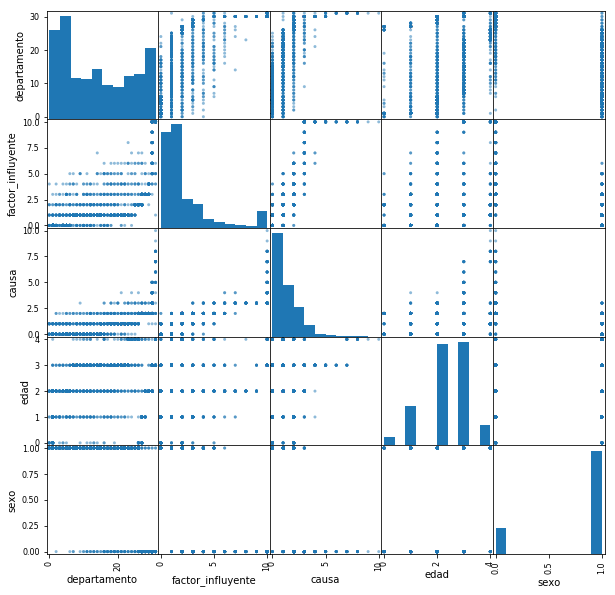

In [10]:
attributes = ["departamento", "factor_influyente", "causa","edad","sexo"]
pd.plotting.scatter_matrix(result1[attributes], figsize=(10,10))


ocultar()

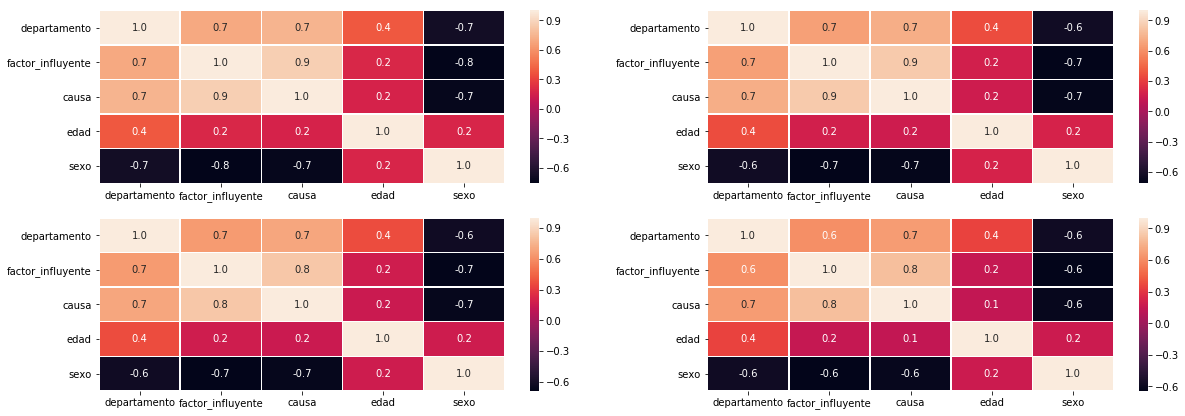

In [15]:
plt.figure(figsize=(20,7))

ax=plt.subplot(221)
sns.heatmap(result1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

ax2=plt.subplot(222)
sns.heatmap(result2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax2)

ax3=plt.subplot(223)
sns.heatmap(result3.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax3)

ax4=plt.subplot(224)
sns.heatmap(result4.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax4)

plt.show()
ocultar()

#### Departamentos vs Numero de suicidios

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31] [ 17 354  45  28  97 335  80  73  93  38  50  74  76  34  55 161  39  28
 103  43  52  63  91  94  27  50  68 107  45  64 195  48]


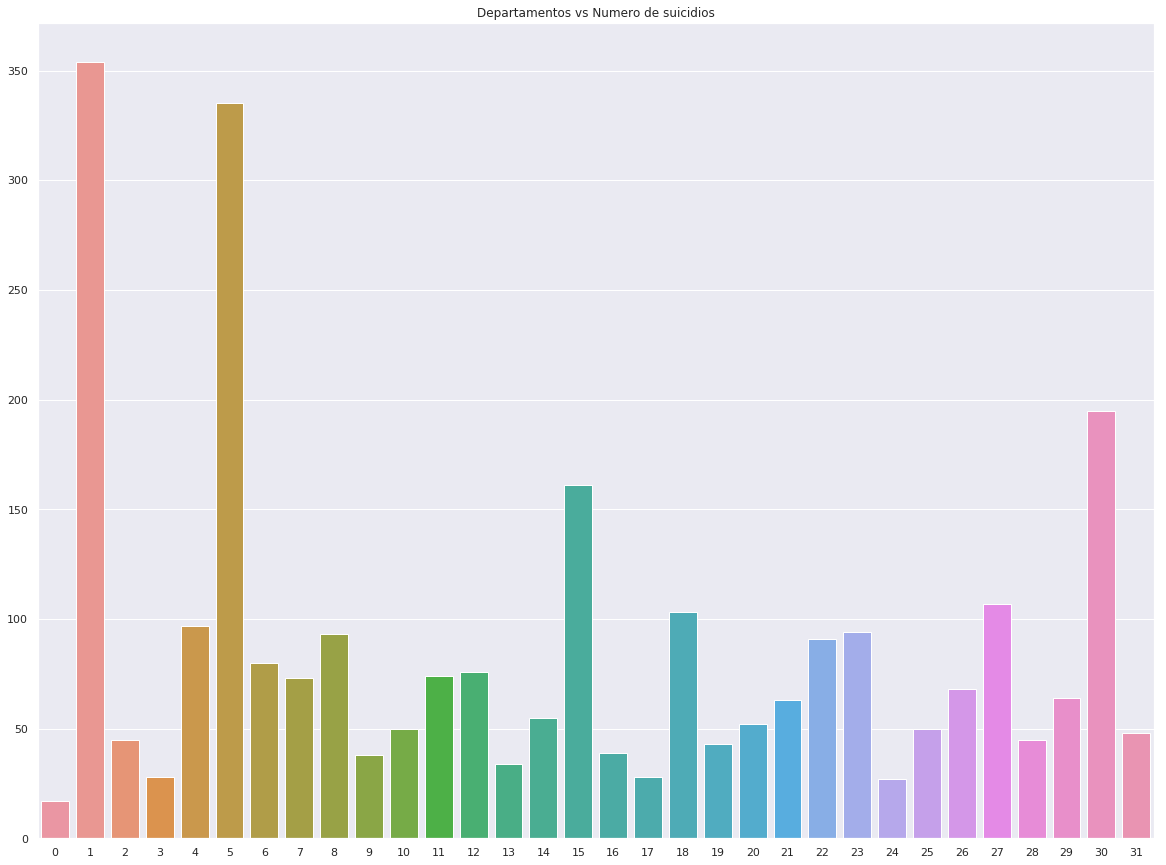

In [20]:
num_dpto, suma=np.unique(result1.departamento,return_counts=True)
print num_dpto, suma
sns.barplot(x=num_dpto,y=suma).set_title('Departamentos vs Numero de suicidios')
sns.set(rc={'figure.figsize':(20,10)})
ocultar()

#### Suicidios vs sexo por año

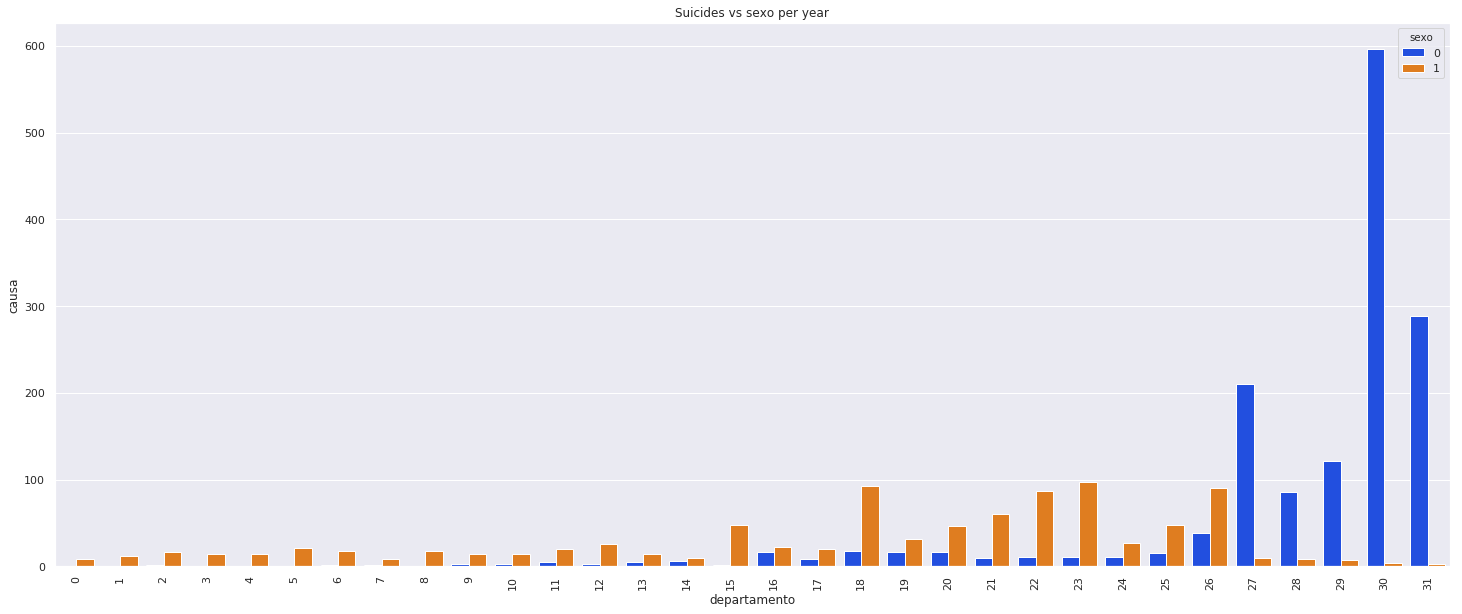

In [21]:
causa_dpto = result1[['causa','sexo','departamento']].groupby(['sexo','departamento']).sum().reset_index()
plt.figure(figsize=(25,10))
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(8,8)})
plt.xticks(rotation=90)
sns.barplot(y='causa', x='departamento', hue='sexo', data=causa_dpto, palette='bright').set_title('Suicides vs sexo per year')
ocultar()

# MUCHOS SUICIDIOS, MUCHOS DATOS
## TODOS NOS PREGUNTAMOS CUAL FUE LA CAUSA?

In [22]:
def tpr(estC,X,y):
    p = estC.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(estC,X,y):
    p = estC.predict(X)
    return np.mean(p[y==0] == y[y==0])
ocultar()

## Gaussian Naive Bayes

In [23]:
X = d.values[:,[0,1,3,4]]
y = d.values[:,2]
y=y.astype('int')
est = GaussianNB()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
st = cross_val_score(est, X, y, cv=KFold(7, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(st), np.std(st))
sn = cross_val_score(est, X, y, cv=KFold(7, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(sn), np.std(sn))
ocultar()

accuracy 0.854 (+/- 0.01851)
tpr      1.000 (+/- 0.00000)
tnr      0.880 (+/- 0.00981)


In [24]:
X1 = result1.values[:,[0,1,3,4]]
y1 = result1.values[:,2]
y1=y1.astype('int')
est = GaussianNB()
s = cross_val_score(est, X1, y1, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
st = cross_val_score(est, X1, y1, cv=KFold(7, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(st), np.std(st))
sn = cross_val_score(est, X1, y1, cv=KFold(7, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(sn), np.std(sn))
ocultar()

accuracy 0.791 (+/- 0.02449)
tpr      0.738 (+/- 0.03462)
tnr      0.962 (+/- 0.01173)


In [25]:
X2 = result2.values[:,[0,1,3,4]]
y2 = result2.values[:,2]
y2=y2.astype('int')
est = GaussianNB()
s = cross_val_score(est, X2, y2, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
st = cross_val_score(est, X2, y2, cv=KFold(7, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(st), np.std(st))
sn = cross_val_score(est, X2, y2, cv=KFold(7, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(sn), np.std(sn))
ocultar()

accuracy 0.706 (+/- 0.03039)
tpr      0.643 (+/- 0.03460)
tnr      0.947 (+/- 0.01048)


In [26]:
X3 = result3.values[:,[0,1,3,4]]
y3 = result3.values[:,2]
y3=y3.astype('int')
est = GaussianNB()
s = cross_val_score(est, X3, y3, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
st = cross_val_score(est, X3, y3, cv=KFold(7, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(st), np.std(st))
sn = cross_val_score(est, X3, y3, cv=KFold(7, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(sn), np.std(sn))
ocultar()

accuracy 0.711 (+/- 0.01879)
tpr      0.583 (+/- 0.01372)
tnr      0.927 (+/- 0.02302)


In [27]:
X4 = result4.values[:,[0,1,3,4]]
y4 = result4.values[:,2]
y4=y4.astype('int')
est = GaussianNB()
s = cross_val_score(est, X4, y4, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
st = cross_val_score(est, X4, y4, cv=KFold(7, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(st), np.std(st))
sn = cross_val_score(est, X4, y4, cv=KFold(7, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(sn), np.std(sn))
ocultar()

accuracy 0.658 (+/- 0.01689)
tpr      0.499 (+/- 0.03280)
tnr      0.911 (+/- 0.01261)


## Random Forest

In [28]:
estC = RandomForestClassifier()
sC = cross_val_score(estC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(sC), np.std(sC))
st = cross_val_score(estC, X, y, cv=KFold(7, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(st), np.std(st))
sn = cross_val_score(estC, X, y, cv=KFold(7, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(sn), np.std(sn))
ocultar()

accuracy 0.945 (+/- 0.00914)
tpr      0.897 (+/- 0.03666)
tnr      1.000 (+/- 0.00000)


In [29]:
estC = RandomForestClassifier()
sC = cross_val_score(estC, X1, y1, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(sC), np.std(sC))
st = cross_val_score(estC, X1, y1, cv=KFold(7, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(st), np.std(st))
sn = cross_val_score(estC, X1, y1, cv=KFold(7, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(sn), np.std(sn))
ocultar()

accuracy 0.835 (+/- 0.01378)
tpr      0.740 (+/- 0.05312)
tnr      0.937 (+/- 0.01792)


In [30]:
estC = RandomForestClassifier()
sC = cross_val_score(estC, X2, y2, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(sC), np.std(sC))
st = cross_val_score(estC, X2, y2, cv=KFold(7, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(st), np.std(st))
sn = cross_val_score(estC, X2, y2, cv=KFold(7, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(sn), np.std(sn))
ocultar()

accuracy 0.763 (+/- 0.03005)
tpr      0.670 (+/- 0.03515)
tnr      0.892 (+/- 0.01102)


In [31]:
estC = RandomForestClassifier()
sC = cross_val_score(estC, X3, y3, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(sC), np.std(sC))
st = cross_val_score(estC, X3, y3, cv=KFold(7, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(st), np.std(st))
sn = cross_val_score(estC, X3, y3, cv=KFold(7, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(sn), np.std(sn))
ocultar()

accuracy 0.716 (+/- 0.01819)
tpr      0.653 (+/- 0.03106)
tnr      0.842 (+/- 0.02084)


In [32]:
estC = RandomForestClassifier()
sC = cross_val_score(estC, X4, y4, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(sC), np.std(sC))
st = cross_val_score(estC, X4, y4, cv=KFold(7, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(st), np.std(st))
sn = cross_val_score(estC, X4, y4, cv=KFold(7, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(sn), np.std(sn))
ocultar()

accuracy 0.676 (+/- 0.01980)
tpr      0.626 (+/- 0.03686)
tnr      0.809 (+/- 0.02086)


## Decision Tree

In [33]:
est = DecisionTreeClassifier()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.945 (+/- 0.01851)
tpr      0.898 (+/- 0.03262)
tnr      1.000 (+/- 0.00000)


In [34]:
est = DecisionTreeClassifier()
s = cross_val_score(est, X1, y1, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X1, y1, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X1, y1, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.835 (+/- 0.01944)
tpr      0.711 (+/- 0.05209)
tnr      0.943 (+/- 0.02038)


In [35]:
est = DecisionTreeClassifier()
s = cross_val_score(est, X2, y2, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X2, y2, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X2, y2, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.762 (+/- 0.02209)
tpr      0.657 (+/- 0.04673)
tnr      0.906 (+/- 0.02133)


In [36]:
est = DecisionTreeClassifier()
s = cross_val_score(est, X3, y3, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X3, y3, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X3, y3, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.711 (+/- 0.01424)
tpr      0.634 (+/- 0.04030)
tnr      0.860 (+/- 0.02010)


In [37]:
est = DecisionTreeClassifier()
s = cross_val_score(est, X4, y4, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X4, y4, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(est, X4, y4, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.684 (+/- 0.01644)
tpr      0.638 (+/- 0.04008)
tnr      0.830 (+/- 0.03000)


## SVC

In [38]:
estS = SVC()
s = cross_val_score(estS, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(estS, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(estS, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.945 (+/- 0.01076)
tpr      0.897 (+/- 0.04746)
tnr      1.000 (+/- 0.00000)


In [39]:
estS = SVC()
s = cross_val_score(estS, X1, y1, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(estS, X1, y1, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(estS, X1, y1, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.845 (+/- 0.01375)
tpr      0.774 (+/- 0.03473)
tnr      0.937 (+/- 0.01968)


In [40]:
estS = SVC()
s = cross_val_score(estS, X2, y2, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(estS, X2, y2, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(estS, X2, y2, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.798 (+/- 0.02598)
tpr      0.734 (+/- 0.04151)
tnr      0.910 (+/- 0.02577)


In [41]:
estS = SVC()
s = cross_val_score(estS, X3, y3, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(estS, X3, y3, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(estS, X3, y3, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.749 (+/- 0.01780)
tpr      0.690 (+/- 0.03753)
tnr      0.872 (+/- 0.01843)


In [42]:
estS = SVC()
s = cross_val_score(estS, X4, y4, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(estS, X4, y4, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(estS, X4, y4, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.707 (+/- 0.01353)
tpr      0.686 (+/- 0.03090)
tnr      0.820 (+/- 0.03307)


## PCA - SVC

In [43]:
P1 = PCA(n_components=4).fit_transform(X)
s = cross_val_score(SVC(), P1, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.943 (+/- 0.01133)


In [44]:
P2 = PCA(n_components=4).fit_transform(X1)
s = cross_val_score(SVC(), P2, y1, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.847 (+/- 0.02045)


## Metodo Extra Tress Classifier

In [45]:
clf = ExtraTreesClassifier() 
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.946 (+/- 0.00809)
tpr      0.898 (+/- 0.04312)
tnr      1.000 (+/- 0.00000)


In [46]:
clf = ExtraTreesClassifier() 
s = cross_val_score(clf, X1, y1, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X1, y1, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X1, y1, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.842 (+/- 0.02863)
tpr      0.740 (+/- 0.04118)
tnr      0.946 (+/- 0.02108)


In [47]:
clf = ExtraTreesClassifier() 
s = cross_val_score(clf, X2, y2, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X2, y2, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X2, y2, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.761 (+/- 0.01473)
tpr      0.665 (+/- 0.04336)
tnr      0.911 (+/- 0.01576)


In [48]:
clf = ExtraTreesClassifier() 
s = cross_val_score(clf, X3, y3, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X3, y3, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X3, y3, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.715 (+/- 0.01860)
tpr      0.636 (+/- 0.04159)
tnr      0.856 (+/- 0.02252)


In [49]:
clf = ExtraTreesClassifier() 
s = cross_val_score(clf, X4, y4, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print "accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X4, y4, cv=KFold(10, shuffle=True), scoring=tpr)
print "tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
s = cross_val_score(clf, X4, y4, cv=KFold(10, shuffle=True), scoring=tnr)
print "tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s))
ocultar()

accuracy 0.684 (+/- 0.02304)
tpr      0.639 (+/- 0.02946)
tnr      0.830 (+/- 0.03145)


# Comparacion de accuracy entre metodos

### Antes 

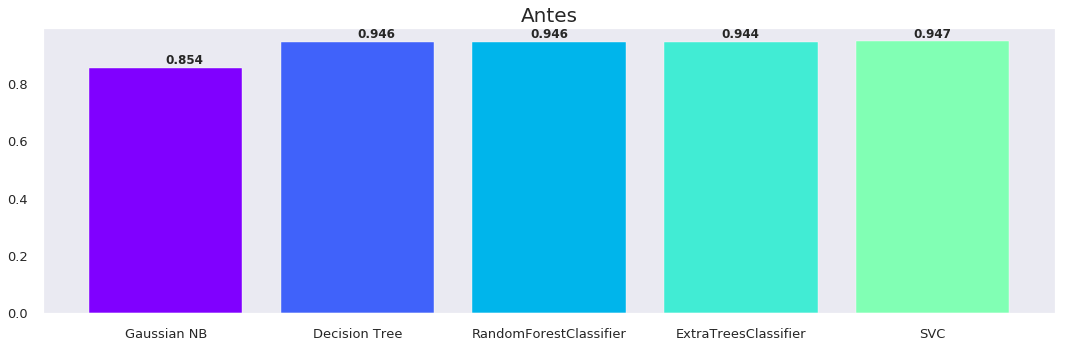

In [50]:
r2_score = np.array([0.854, 0.946, 0.945, 0.947,0.946])
labels = np.array(['Gaussian NB', 'RandomForestClassifier', 'Decision Tree','SVC','ExtraTreesClassifier'])
indices = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (15,5)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
label = ['0.854', '0.946','0.946','0.947','0.944']
plt.text(0,0.87,s = label[0],weight='bold')
plt.text(1,0.96,s = label[1],weight='bold')
plt.text(1.9,0.96,s = label[2],weight='bold')
plt.text(3.9,0.96,s = label[3],weight='bold')
plt.text(2.9,0.96,s = label[4],weight='bold')
plt.title('Antes', fontsize = 20)
plt.grid()
plt.tight_layout()
plt.show()
ocultar()

### Con los metodos

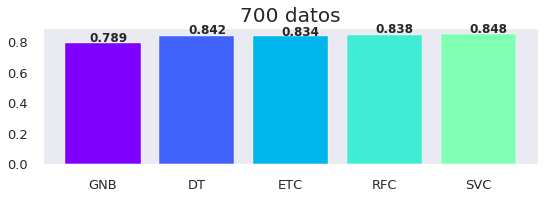

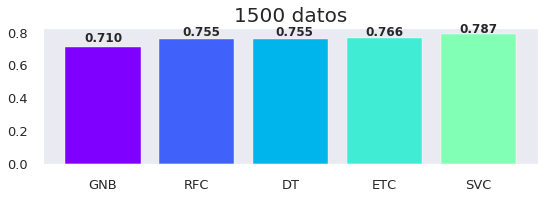

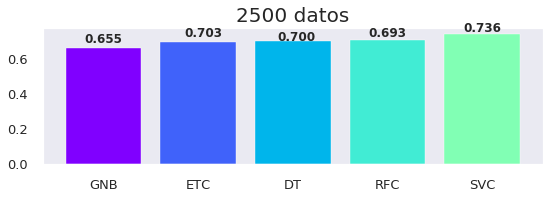

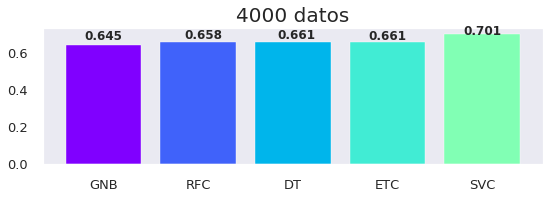

In [51]:
r2_score = np.array([0.789,0.842, 0.834, 0.848, 0.838])
labels = np.array(['GNB', 'RFC', 'DT','SVC','ETC'])
indices = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))


plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(221)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
label = ['0.789','0.842', '0.834', '0.848', '0.838']
plt.text(-0.15,0.8,s = label[0],weight='bold')
plt.text(0.91,0.85,s = label[1],weight='bold')
plt.text(1.9,0.84,s = label[2],weight='bold')
plt.text(3.9,0.86,s = label[3],weight='bold')
plt.text(2.9,0.86,s = label[4],weight='bold')
plt.title('700 datos', fontsize = 20, loc='center')
plt.grid()
plt.tight_layout()
plt.show()


r3_score = np.array([0.710,0.755,0.755,0.787,0.766])
labels = np.array(['GNB', 'RFC', 'DT','SVC','ETC'])
indices = np.argsort(r3_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))


plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (15,5)
plt.subplot(222)
plt.bar(range(len(indices)), r3_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
label = ['0.710','0.755','0.755','0.787','0.766']
plt.text(-0.2,0.74,s = label[0],weight='bold')
plt.text(0.85,0.78,s = label[1],weight='bold')
plt.text(1.84,0.78,s = label[2],weight='bold')
plt.text(3.8,0.8,s = label[3],weight='bold')
plt.text(2.8,0.78,s = label[4],weight='bold')
plt.title('1500 datos', fontsize = 20, loc='center')
plt.grid()
plt.tight_layout()
plt.show()

r4_score = np.array([0.655,0.703, 0.700, 0.736, 0.693])
labels = np.array(['GNB', 'RFC', 'DT','SVC','ETC'])
indices = np.argsort(r4_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.subplot(2,2,3)
plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (15,5)
plt.bar(range(len(indices)), r4_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
label = ['0.655','0.703', '0.700', '0.736', '0.693']
plt.text(-0.2,0.69,s = label[0],weight='bold')
plt.text(0.85,0.72,s = label[1],weight='bold')
plt.text(1.84,0.7,s = label[2],weight='bold')
plt.text(3.8,0.75,s = label[3],weight='bold')
plt.text(2.8,0.72,s = label[4],weight='bold')
plt.title('2500 datos', fontsize = 20, loc='center')
plt.grid()
plt.tight_layout()
plt.show()


r5_score = np.array([0.645, 0.658, 0.661, 0.701, 0.661])
labels = np.array(['GNB', 'RFC', 'DT','SVC','ETC'])
indices = np.argsort(r5_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.subplot(2,2,4)
plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (15,5)
plt.bar(range(len(indices)), r5_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
label = ['0.645', '0.658', '0.661', '0.701', '0.661']
plt.text(-0.2,0.67,s = label[0],weight='bold')
plt.text(0.85,0.68,s = label[1],weight='bold')
plt.text(1.84,0.68,s = label[2],weight='bold')
plt.text(3.8,0.7,s = label[3],weight='bold')
plt.text(2.8,0.67,s = label[4],weight='bold')
plt.title('4000 datos', fontsize = 20, loc='center')
plt.grid()
plt.tight_layout()
plt.show()





ocultar()

### SVC AUMENTANDO LOS DATOS

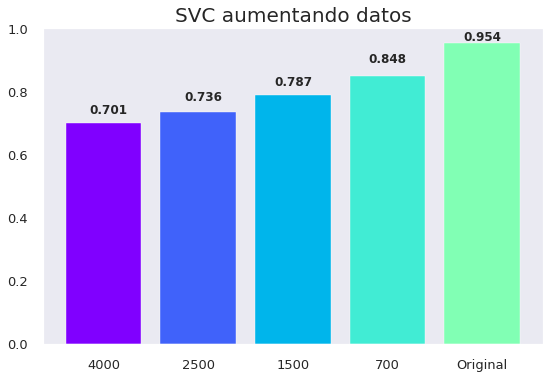

In [52]:
r2_score = np.array([0.954,0.848,0.787, 0.736, 0.701])
labels = np.array(['Original','700', '1500', '2500','4000'])
indices = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 9))


plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (15,10)
plt.subplot(221)
plt.bar(range(len(indices)), r2_score[indices], color = color)
plt.xticks(range(len(indices)), labels[indices])
label = ['0.701','0.736','0.787', '0.954', '0.848']
plt.text(-0.15,0.73,s = label[0],weight='bold')
plt.text(0.85,0.77,s = label[1],weight='bold')
plt.text(1.8,0.82,s = label[2],weight='bold')
plt.text(3.8,0.96,s = label[3],weight='bold')
plt.text(2.8,0.89,s = label[4],weight='bold')
plt.title('SVC aumentando datos', fontsize = 20, loc='center')
plt.grid()
plt.tight_layout()
plt.show()
ocultar()